In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as ex
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import StandardScaler ,OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score 

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/house_pricing.csv')

In [3]:
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [4]:
df.nunique()

City           36
Type            3
Beds            7
Baths           5
SquareFeet    602
Price         814
dtype: int64

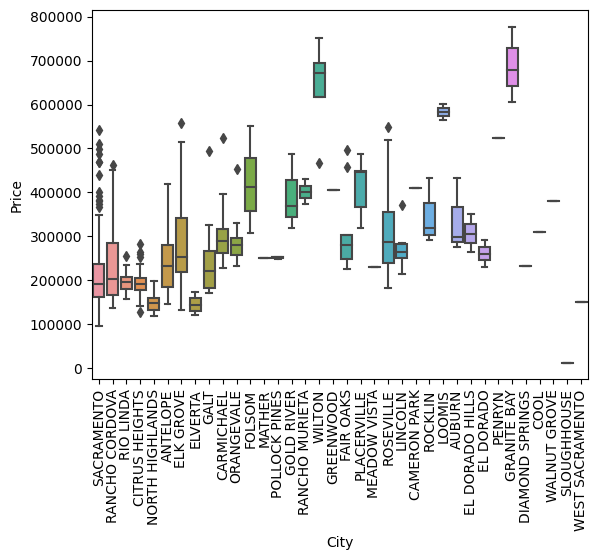

In [5]:
sns.boxplot(data=df,x='City',y='Price',)
plt.xticks(rotation=90)
plt.show()

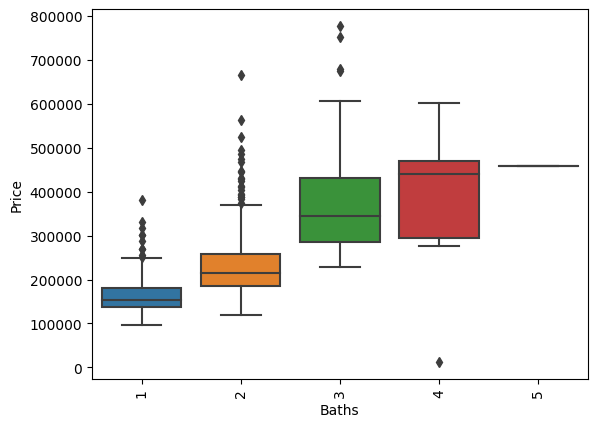

In [6]:
sns.boxplot(data=df,x='Baths',y='Price',)
plt.xticks(rotation=90)
plt.show()

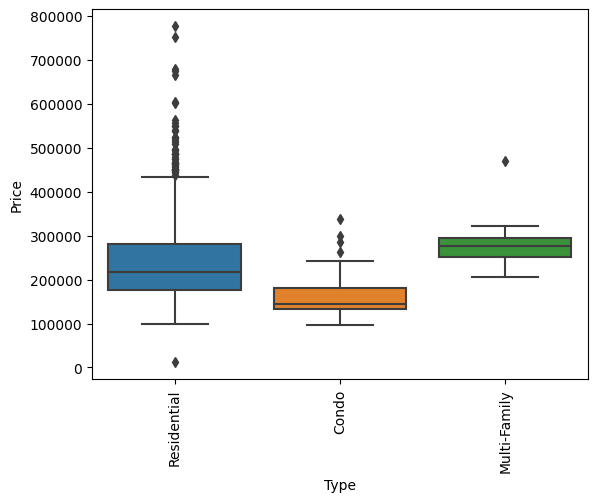

In [7]:
sns.boxplot(data=df,x='Type',y='Price',)
plt.xticks(rotation=90)
plt.show()

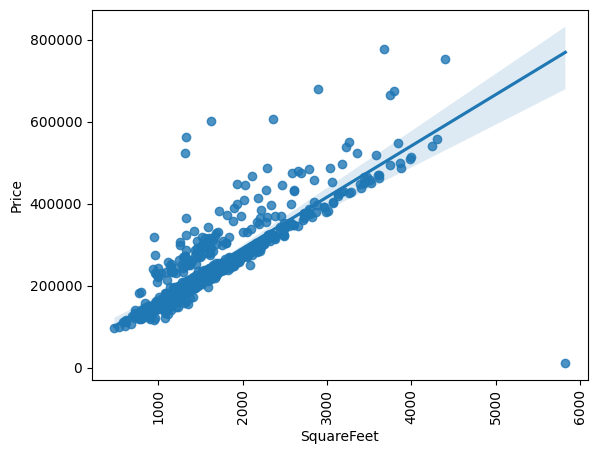

In [8]:
sns.regplot(data=df,x='SquareFeet',y='Price',)
plt.xticks(rotation=90)
plt.show()

In [9]:
df.columns.tolist()

['City', 'Type', 'Beds', 'Baths', 'SquareFeet', 'Price']

In [10]:
num_cols=['Beds','Baths','SquareFeet']
cat_cols=['Type']
X=df[num_cols + cat_cols]
y=df['Price']

In [11]:
numerical=Pipeline(steps=[
    ('StandardScaler',StandardScaler())
])

In [12]:
cat=Pipeline(steps=[(
    ('OneHotEncoder',OneHotEncoder(drop='first'))
)])


In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
preprocessor=ColumnTransformer(transformers=[
    ('num',numerical,num_cols),
    ('cat',cat,cat_cols),
])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
Xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [17]:
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Dec_tree',DecisionTreeRegressor()),
])

In [18]:
model.fit(Xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('StandardScaler',
                                                                   StandardScaler())]),
                                                  ['Beds', 'Baths',
                                                   'SquareFeet']),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Type'])])),
                ('Dec_tree', DecisionTreeRegressor())])

-- explicitly setting parameters 


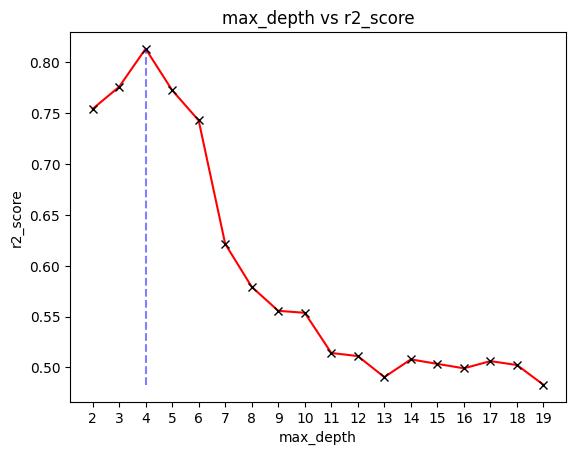

In [19]:
# max_depth 
scores = []
for i in range(2, 20):
    model.named_steps['Dec_tree'].set_params(max_depth=i)
    model.fit(Xtrain, ytrain)
    ypred = model.predict(xtest)
    scores.append(r2_score(ytest, ypred))
plt.plot(range(2, 20), scores, marker='x', color='red', markeredgecolor='black')
plt.vlines(x=4, ymin=min(scores), ymax=max(scores), color='blue', linestyle='--',
        alpha=0.5)
plt.title('max_depth vs r2_score')
plt.xlabel('max_depth')
plt.ylabel('r2_score')
plt.xticks(range(2, 20))
plt.show()

In [20]:
# grid search
#cross-validation
#learning curve
#underfit
#overfit
model.score(Xtrain,ytrain)
ypred=model.predict(xtest)



In [21]:
model.score(xtest,ytest)

0.482830153871073

In [22]:
DecisionTreeRegressor?

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minim

-- Grid search


In [23]:
from sklearn.model_selection import GridSearchCV 

In [24]:
params_Grid={
    'Dec_tree__criterion':["squared_error", "friedman_mse", "absolute_error"],
    'Dec_tree__max_depth':range(2,10),
    'Dec_tree__ccp_alpha':np.linspace(0.0,0.1,10),

}
grid=GridSearchCV(model,params_Grid,cv=4,scoring='r2',verbose=1,n_jobs=-1,)

In [25]:
preprocessor=ColumnTransformer(transformers=[
    ('num',numerical,num_cols),
    ('cat',cat,cat_cols),
])
Xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('Dec_tree',DecisionTreeRegressor()),
])

In [26]:
grid.fit(X,y)

Fitting 4 folds for each of 240 candidates, totalling 960 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('StandardScaler',
                                                                                          StandardScaler())]),
                                                                         ['Beds',
                                                                          'Baths',
                                                                          'SquareFeet']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('OneHotEncoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['Type'])])),
                                       ('Dec_tree',
                                        DecisionTreeRegressor(max_depth=19))]),
             n_jobs=-1,
             param_grid={'Dec_tree__ccp_alpha': array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
                         'Dec_tree__criterion': ['squared_error',
                                                 'friedman_mse',
                                                 'absolute_error'],
                         'Dec_tree__max_depth': range(2, 10)},
             scoring='r2', verbose=1)

In [41]:
grid.best_params_

{'Dec_tree__ccp_alpha': 0.044444444444444446,
 'Dec_tree__criterion': 'absolute_error',
 'Dec_tree__max_depth': 4}

In [40]:
result= pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Dec_tree__ccp_alpha,param_Dec_tree__criterion,param_Dec_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
114,0.010713,0.001948,0.002750,0.001287,0.044444,absolute_error,4,"{'Dec_tree__ccp_alpha': 0.044444444444444446, ...",0.887715,0.739383,0.723488,0.605302,0.738972,0.100290,1
162,0.009118,0.001962,0.002818,0.001288,0.066667,absolute_error,4,"{'Dec_tree__ccp_alpha': 0.06666666666666667, '...",0.887715,0.739383,0.723488,0.605302,0.738972,0.100290,1
42,0.007144,0.000988,0.001746,0.000143,0.011111,absolute_error,4,"{'Dec_tree__ccp_alpha': 0.011111111111111112, ...",0.887715,0.739383,0.723475,0.605302,0.738969,0.100290,3
138,0.007766,0.001491,0.001929,0.000781,0.055556,absolute_error,4,"{'Dec_tree__ccp_alpha': 0.05555555555555556, '...",0.887715,0.739383,0.723475,0.605302,0.738969,0.100290,3
234,0.011289,0.003155,0.003537,0.002042,0.1,absolute_error,4,"{'Dec_tree__ccp_alpha': 0.1, 'Dec_tree__criter...",0.887715,0.739383,0.723475,0.605302,0.738969,0.100290,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.004754,0.002785,0.002652,0.002076,0.088889,friedman_mse,9,"{'Dec_tree__ccp_alpha': 0.08888888888888889, '...",0.720459,0.584282,0.612931,0.477829,0.598875,0.086379,236
111,0.005257,0.001209,0.002294,0.000881,0.044444,friedman_mse,9,"{'Dec_tree__ccp_alpha': 0.044444444444444446, ...",0.720394,0.584315,0.612607,0.475763,0.598270,0.087067,237
15,0.006106,0.003060,0.002808,0.000868,0.0,friedman_mse,9,"{'Dec_tree__ccp_alpha': 0.0, 'Dec_tree__criter...",0.721602,0.580992,0.612574,0.474664,0.597458,0.088019,238
135,0.004514,0.002424,0.001393,0.000100,0.055556,friedman_mse,9,"{'Dec_tree__ccp_alpha': 0.05555555555555556, '...",0.723170,0.575542,0.612927,0.478074,0.597428,0.087715,239


In [32]:
final_model=grid.best_estimator_

In [ ]:
# ypred = final_model.predict(Xtest)
# print('R2:', r2_score(ytest, ypred))
# print('MAE:', mean_absolute_error(ytest, ypred))
# print('MSE:', mean_squared_error(ytest, ypred))

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('StandardScaler',
                                                                   StandardScaler())]),
                                                  ['Beds', 'Baths',
                                                   'SquareFeet']),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Type'])])),
                ('Dec_tree',
                 DecisionTreeRegressor(criterion='absolute_error',
                                       max_depth=4))])

/Users/ayush/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ayush/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rank_test_score', ylabel='mean_test_score'>

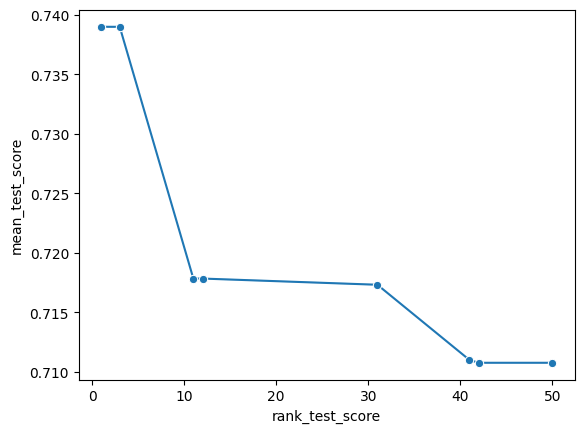

In [34]:
sns.lineplot(data=result.head(50), x='rank_test_score', y='mean_test_score', marker='o')

/Users/ayush/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mean_test_score', ylabel='Count'>

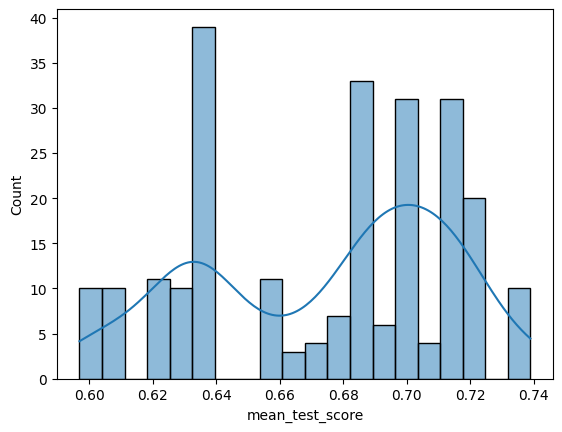

In [36]:
sns.histplot(data=result, x='mean_test_score', bins=20, kde=True)

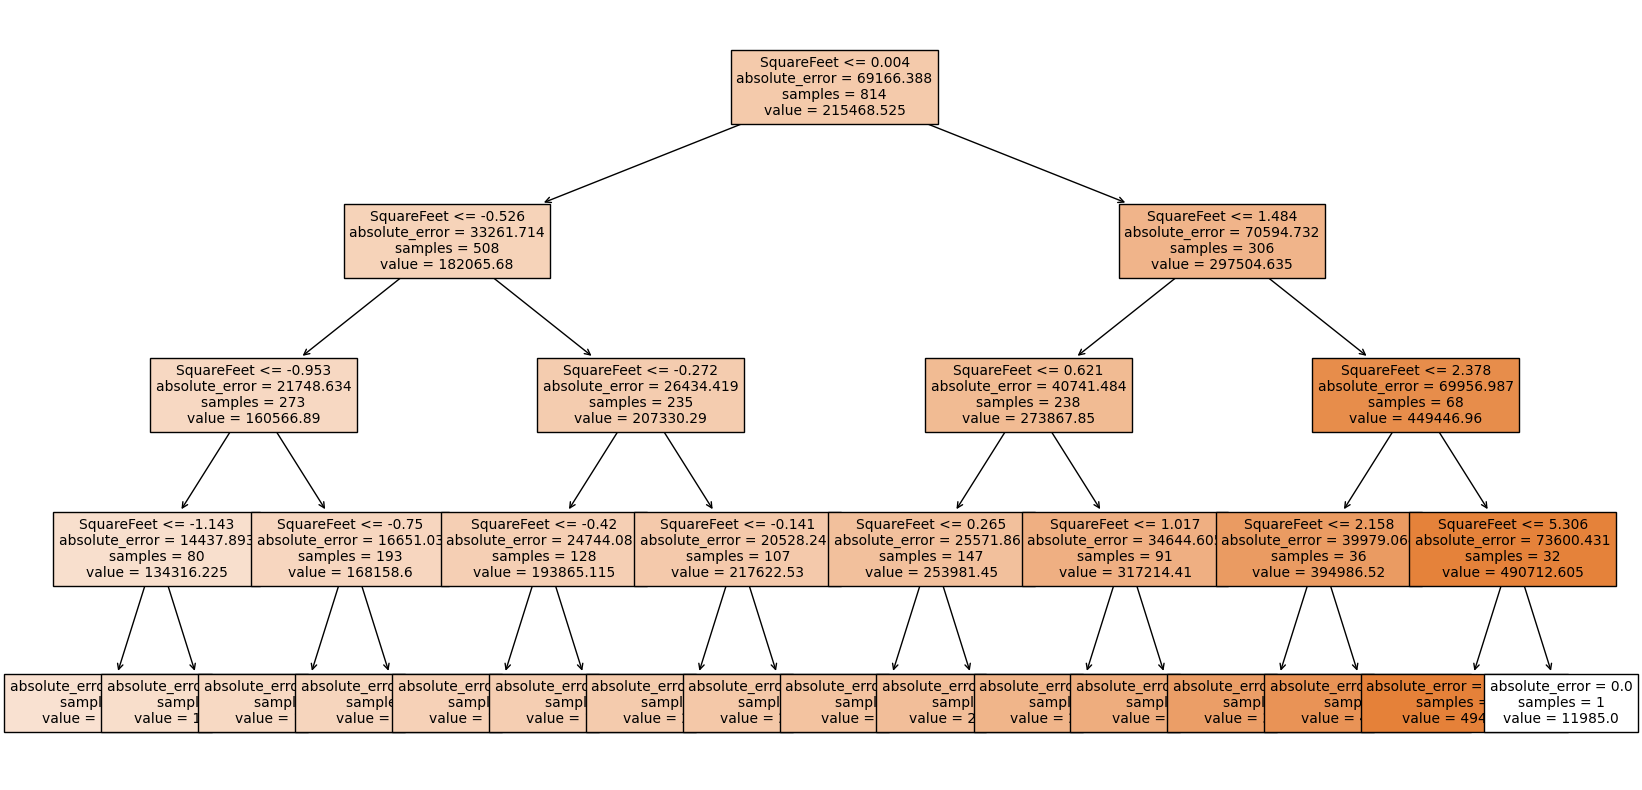

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(final_model.named_steps['Dec_tree'], 
        feature_names=X.columns, 
        filled=True, 
        fontsize=10)
plt.show()